In [86]:
! pip install bs4
! pip install requests
from bs4 import BeautifulSoup
import requests
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

! pip install folium==0.5.0
import folium # plotting library
print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

In [2]:
#scraping data from wiki
html_data=requests.get('https://web.archive.org/web/20080509171047/http://www.sandiego.gov/neighborhoodmaps/').text
soup=BeautifulSoup(html_data,'lxml')
soup.title

<title>Neighborhood Maps | City of San Diego</title>

In [3]:
Neighborhoods_data=pd.DataFrame(columns=['Region','Neighborhood'])
for row in soup.find_all('span'):
    for temp in row.text.strip().split('\n\t\t\t\t')[1:]:
        Region=row.find('a').text
        Neighborhood=temp
    #print(Neighborhood[1:])
        Neighborhoods_data=Neighborhoods_data.append({'Region':Region,'Neighborhood':Neighborhood},ignore_index=True)
Neighborhoods_data.head(20)

,Region,Neighborhood
0,Northern,Bay Ho
1,Northern,Bay Park
2,Northern,Carmel Valley
3,Northern,Clairemont Mesa East
4,Northern,Clairemont Mesa West
5,Northern,Del Mar Heights
6,Northern,La Jolla
7,Northern,La Jolla Village
8,Northern,Mission Beach
9,Northern,Mission Bay Park


In [4]:
Neighborhoods_data.shape

(121, 2)

In [5]:
Neighborhoods_data['Region'].unique()

array(['Northern', 'Eastern', 'Southeastern', 'Northeastern', 'Central',
       'Southern', 'Western', 'Mid-City'], dtype=object)

In [6]:
Northern_data=Neighborhoods_data[Neighborhoods_data['Region']=='Northern'].reset_index(drop=True)

In [18]:
Northern_data

,Region,Neighborhood
0,Northern,Bay Ho
1,Northern,Bay Park
2,Northern,Carmel Valley
3,Northern,Clairemont Mesa East
4,Northern,Clairemont Mesa West
5,Northern,Del Mar Heights
6,Northern,La Jolla
7,Northern,La Jolla Village
8,Northern,Mission Beach
9,Northern,Mission Bay Park


In [7]:
lati_long=Northern_data[['Neighborhood']]

In [11]:
lati_long['Latitude']=[32.8242,32.7918,32.9439,32.8124,32.8072,32.9515,32.8289,32.8429,32.7733,32.7778,32.9771,32.8328,32.8064,32.8969,32.9194,32.8636]

In [12]:
lati_long['Longitude']=[-117.2176,-117.2000,-117.2308,-117.1676,-117.1852,-117.2529,-117.2647,-117.2320,-117.2503,-117.2265,-117.2162,-117.2000,-117.2382,-117.2387,-117.2461,-117.2121]

In [13]:
lati_long

,Neighborhood,Latitude,Longitude
0,Bay Ho,32.8242,-117.2176
1,Bay Park,32.7918,-117.2000
2,Carmel Valley,32.9439,-117.2308
3,Clairemont Mesa East,32.8124,-117.1676
4,Clairemont Mesa West,32.8072,-117.1852
5,Del Mar Heights,32.9515,-117.2529
6,La Jolla,32.8289,-117.2647
7,La Jolla Village,32.8429,-117.2320
8,Mission Beach,32.7733,-117.2503
9,Mission Bay Park,32.7778,-117.2265


In [14]:
df = pd.merge(Neighborhoods_data,lati_long,on='Neighborhood')
df['Price ($)']=[878644,993202,1284041,757674,810498,1643284,1874385,784488,1287889,828656,1801601,790675,1009741,603162,1524588,784488]
df

,Region,Neighborhood,Latitude,Longitude,Price ($)
0,Northern,Bay Ho,32.8242,-117.2176,878644
1,Northern,Bay Park,32.7918,-117.2000,993202
2,Northern,Carmel Valley,32.9439,-117.2308,1284041
3,Northern,Clairemont Mesa East,32.8124,-117.1676,757674
4,Northern,Clairemont Mesa West,32.8072,-117.1852,810498
5,Northern,Del Mar Heights,32.9515,-117.2529,1643284
6,Northern,La Jolla,32.8289,-117.2647,1874385
7,Northern,La Jolla Village,32.8429,-117.2320,784488
8,Northern,Mission Beach,32.7733,-117.2503,1287889
9,Northern,Mission Bay Park,32.7778,-117.2265,828656


In [15]:
map_sandiego = folium.Map(location=[32.8317,-117.1220],zoom_start=10)

for lat,lng,Region,neighborhood in zip(df['Latitude'],df['Longitude'],df['Region'],df['Neighborhood']):
    label = '{},{}'.format(neighborhood,Region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sandiego)
map_sandiego

In [16]:
CLIENT_ID = 'C41E23DNKLKULKPPKFER0SQZZMXBIOQ4WFVZM50V3KWZUCQW' # your Foursquare ID
CLIENT_SECRET = 'ZLARCFIGN1BT3XETAOT2MQTED0AYYAYF02B3USWPONH5VBAL' # your Foursquare Secret
ACCESS_TOKEN = 'VYHJ4GHH23GWOS1PZ4QQ5DAVJMH3RTEJULBKLN4ZCP4LKILX' # your FourSquare Access Token
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C41E23DNKLKULKPPKFER0SQZZMXBIOQ4WFVZM50V3KWZUCQW
CLIENT_SECRET:ZLARCFIGN1BT3XETAOT2MQTED0AYYAYF02B3USWPONH5VBAL


In [222]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ho are 32.8242, -117.2176.


In [223]:
LIMIT=200
radius=2000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [224]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6068e9ed27744b04502e6465'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Bay Ho',
  'headerFullLocation': 'Bay Ho, San Diego',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 78,
  'suggestedBounds': {'ne': {'lat': 32.842200018000014,
    'lng': -117.19622001273909},
   'sw': {'lat': 32.80619998199998, 'lng': -117.23897998726092}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d35f9099ced6dcbc0168029',
       'name': 'El Rey Taco Shop',
       'location': {'address': '4386 Moraga Ave',
        'lat': 32.82332685058822,
        'lng': -117.21407001226154,
        'labeledLatLngs': [{'

In [20]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
#nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues['categories']=[category[0]['name'] for category in nearby_venues['categories']]
nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,name,categories,lat,lng
0,San Diego Harley-Davidson,Motorcycle Shop,32.822666,-117.226574
1,El Rey Taco Shop,Mexican Restaurant,32.823327,-117.214070
2,Costco Tire Center,Automotive Shop,32.822858,-117.224535
3,Costco Food Court,Food Court,32.821746,-117.224616
4,The Fruit Stand,Farmers Market,32.816834,-117.221380
...,...,...,...,...
73,SportRx,Optical Shop,32.814869,-117.220595
74,Frank's Starshine Market,Convenience Store,32.835927,-117.222804
75,McDonald's,Fast Food Restaurant,32.833172,-117.201923
76,Rose Canyon,Mountain,32.834580,-117.233023


In [142]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
     #   print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [143]:
Sandiego_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [144]:
print(Sandiego_venues.shape)

(1600, 7)


In [25]:
duplicateRowsDF = Sandiego_venues[Sandiego_venues.duplicated(keep='last')]
duplicateRowsDF

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [26]:
Sandiego_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bay Ho,100,100,100,100,100,100
Bay Park,100,100,100,100,100,100
Carmel Valley,100,100,100,100,100,100
Clairemont Mesa East,100,100,100,100,100,100
Clairemont Mesa West,100,100,100,100,100,100
Del Mar Heights,100,100,100,100,100,100
La Jolla,100,100,100,100,100,100
La Jolla Village,100,100,100,100,100,100
Mission Bay Park,100,100,100,100,100,100


In [27]:
print('There are {} uniques categories.'.format(len(Sandiego_venues['Venue Category'].unique())))

There are 168 uniques categories.


In [28]:
# one hot encoding
Sandiego_onehot = pd.get_dummies(Sandiego_venues[['Venue Category']], prefix="", prefix_sep="")
#Sandiego_onehot.rename(columns={'Neighborhood':'Neighbor hood'},inplace=True)
# add neighborhood column back to dataframe
Sandiego_onehot['Neighborhood'] = Sandiego_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [Sandiego_onehot.columns[-1]]+ list(Sandiego_onehot.columns[:-1])
Sandiego_onehot = Sandiego_onehot[fixed_columns]
Sandiego_onehot.head(20)

,Neighborhood,Alternative Healer,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,...,Toy / Game Store,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Women's Store,Yoga Studio,Zoo Exhibit
0,Bay Ho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bay Ho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bay Ho,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bay Ho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bay Ho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Bay Ho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Bay Ho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Bay Ho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Bay Ho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Bay Ho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
Sandiego_onehot.shape

(1600, 169)

In [31]:
Sandiego_grouped = Sandiego_onehot.groupby('Neighborhood').mean().reset_index()
Sandiego_grouped.head()

,Neighborhood,Alternative Healer,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,...,Toy / Game Store,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Women's Store,Yoga Studio,Zoo Exhibit
0,Bay Ho,0.0,0.00,0.00,0.0,0.0,0.0,0.01,0.01,0.0,...,0.0,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00
1,Bay Park,0.0,0.03,0.02,0.0,0.0,0.0,0.00,0.02,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01
2,Carmel Valley,0.0,0.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.05,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00
3,Clairemont Mesa East,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00
4,Clairemont Mesa West,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00


In [32]:
num_top_venues = 5

for hood in Sandiego_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Sandiego_grouped[Sandiego_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bay Ho----
                venue  freq
0         Coffee Shop  0.07
1                Park  0.06
2  Mexican Restaurant  0.06
3       Grocery Store  0.05
4               Beach  0.05


----Bay Park----
                venue  freq
0                Park  0.06
1  Mexican Restaurant  0.05
2     Thai Restaurant  0.04
3               Beach  0.04
4                Café  0.04


----Carmel Valley----
                venue  freq
0         Coffee Shop  0.08
1               Beach  0.06
2  Seafood Restaurant  0.06
3  Italian Restaurant  0.05
4               Trail  0.05


----Clairemont Mesa East----
                 venue  freq
0  Japanese Restaurant  0.07
1     Sushi Restaurant  0.05
2        Grocery Store  0.04
3    Korean Restaurant  0.04
4               Bakery  0.03


----Clairemont Mesa West----
                  venue  freq
0   Japanese Restaurant  0.07
1      Sushi Restaurant  0.05
2         Grocery Store  0.05
3           Pizza Place  0.04
4  Fast Food Restaurant  0.04


----Del Mar Heights-

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Sandiego_grouped['Neighborhood']

for ind in np.arange(Sandiego_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Sandiego_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ho,Coffee Shop,Mexican Restaurant,Park,Grocery Store,Beach,Pizza Place,Seafood Restaurant,Fast Food Restaurant,Breakfast Spot,Burger Joint
1,Bay Park,Park,Mexican Restaurant,Pizza Place,Beach,Café,Thai Restaurant,Coffee Shop,American Restaurant,Seafood Restaurant,Brewery
2,Carmel Valley,Coffee Shop,Beach,Seafood Restaurant,Trail,Italian Restaurant,American Restaurant,Mediterranean Restaurant,New American Restaurant,Golf Course,Restaurant
3,Clairemont Mesa East,Japanese Restaurant,Sushi Restaurant,Grocery Store,Korean Restaurant,Café,Pizza Place,Dessert Shop,Mexican Restaurant,Noodle House,Fast Food Restaurant
4,Clairemont Mesa West,Japanese Restaurant,Grocery Store,Sushi Restaurant,Pizza Place,Fast Food Restaurant,Thai Restaurant,Korean Restaurant,Park,Coffee Shop,Mexican Restaurant
5,Del Mar Heights,Coffee Shop,Beach,Seafood Restaurant,Mexican Restaurant,American Restaurant,Trail,Italian Restaurant,Grocery Store,Breakfast Spot,Park
6,La Jolla,Beach,Breakfast Spot,Seafood Restaurant,Coffee Shop,Italian Restaurant,Park,American Restaurant,Mexican Restaurant,Café,Surf Spot
7,La Jolla Village,Coffee Shop,Seafood Restaurant,Beach,Park,Café,New American Restaurant,Grocery Store,Italian Restaurant,Scenic Lookout,Ice Cream Shop
8,Mission Bay Park,Park,Beach,Coffee Shop,Bar,Brewery,Seafood Restaurant,Grocery Store,Fast Food Restaurant,Breakfast Spot,Theme Park
9,Mission Beach,Beach,Park,Bar,American Restaurant,Brewery,Burger Joint,Mexican Restaurant,Coffee Shop,Seafood Restaurant,Café


In [35]:
kclusters = 5

Sandiego_grouped_clustering = Sandiego_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Sandiego_grouped_clustering)

# check cluster labels generated for each row in the dataframekmeans.labels_
kmeans.labels_

array([0, 0, 4, 1, 1, 4, 0, 2, 3, 3, 4, 1, 0, 2, 4, 2], dtype=int32)

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()
Sandiego_merged = df
Sandiego_merged = Sandiego_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Sandiego_merged.dropna(subset=['Cluster Labels'],axis=0,inplace=True)
Sandiego_merged.reset_index(drop=True,inplace=True)
Sandiego_merged.head(10) # check the last columns!

,Region,Neighborhood,Latitude,Longitude,Price ($),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Northern,Bay Ho,32.8242,-117.2176,878644,0,Coffee Shop,Mexican Restaurant,Park,Grocery Store,Beach,Pizza Place,Seafood Restaurant,Fast Food Restaurant,Breakfast Spot,Burger Joint
1,Northern,Bay Park,32.7918,-117.2000,993202,0,Park,Mexican Restaurant,Pizza Place,Beach,Café,Thai Restaurant,Coffee Shop,American Restaurant,Seafood Restaurant,Brewery
2,Northern,Carmel Valley,32.9439,-117.2308,1284041,4,Coffee Shop,Beach,Seafood Restaurant,Trail,Italian Restaurant,American Restaurant,Mediterranean Restaurant,New American Restaurant,Golf Course,Restaurant
3,Northern,Clairemont Mesa East,32.8124,-117.1676,757674,1,Japanese Restaurant,Sushi Restaurant,Grocery Store,Korean Restaurant,Café,Pizza Place,Dessert Shop,Mexican Restaurant,Noodle House,Fast Food Restaurant
4,Northern,Clairemont Mesa West,32.8072,-117.1852,810498,1,Japanese Restaurant,Grocery Store,Sushi Restaurant,Pizza Place,Fast Food Restaurant,Thai Restaurant,Korean Restaurant,Park,Coffee Shop,Mexican Restaurant
5,Northern,Del Mar Heights,32.9515,-117.2529,1643284,4,Coffee Shop,Beach,Seafood Restaurant,Mexican Restaurant,American Restaurant,Trail,Italian Restaurant,Grocery Store,Breakfast Spot,Park
6,Northern,La Jolla,32.8289,-117.2647,1874385,0,Beach,Breakfast Spot,Seafood Restaurant,Coffee Shop,Italian Restaurant,Park,American Restaurant,Mexican Restaurant,Café,Surf Spot
7,Northern,La Jolla Village,32.8429,-117.2320,784488,2,Coffee Shop,Seafood Restaurant,Beach,Park,Café,New American Restaurant,Grocery Store,Italian Restaurant,Scenic Lookout,Ice Cream Shop
8,Northern,Mission Beach,32.7733,-117.2503,1287889,3,Beach,Park,Bar,American Restaurant,Brewery,Burger Joint,Mexican Restaurant,Coffee Shop,Seafood Restaurant,Café
9,Northern,Mission Bay Park,32.7778,-117.2265,828656,3,Park,Beach,Coffee Shop,Bar,Brewery,Seafood Restaurant,Grocery Store,Fast Food Restaurant,Breakfast Spot,Theme Park


In [37]:
# create map
map_Sandiego_clusters = folium.Map(location=[32.8317,-117.1220],zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
a=0
for lat, lon, poi, cluster in zip(Sandiego_merged['Latitude'], Sandiego_merged['Longitude'], Sandiego_merged['Neighborhood'], Sandiego_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_Sandiego_clusters)
map_Sandiego_clusters

In [105]:
cluster1=Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 0, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]
Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 0, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]

,Neighborhood,Price ($),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ho,878644,0,Coffee Shop,Mexican Restaurant,Park,Grocery Store,Beach,Pizza Place,Seafood Restaurant,Fast Food Restaurant,Breakfast Spot,Burger Joint
1,Bay Park,993202,0,Park,Mexican Restaurant,Pizza Place,Beach,Café,Thai Restaurant,Coffee Shop,American Restaurant,Seafood Restaurant,Brewery
6,La Jolla,1874385,0,Beach,Breakfast Spot,Seafood Restaurant,Coffee Shop,Italian Restaurant,Park,American Restaurant,Mexican Restaurant,Café,Surf Spot
12,Pacific Beach,1009741,0,Beach,Park,Seafood Restaurant,Coffee Shop,Breakfast Spot,Mexican Restaurant,Bar,Pizza Place,Burger Joint,Café


----Bay Ho----
----Bay Park----
----La Jolla----
----Pacific Beach----


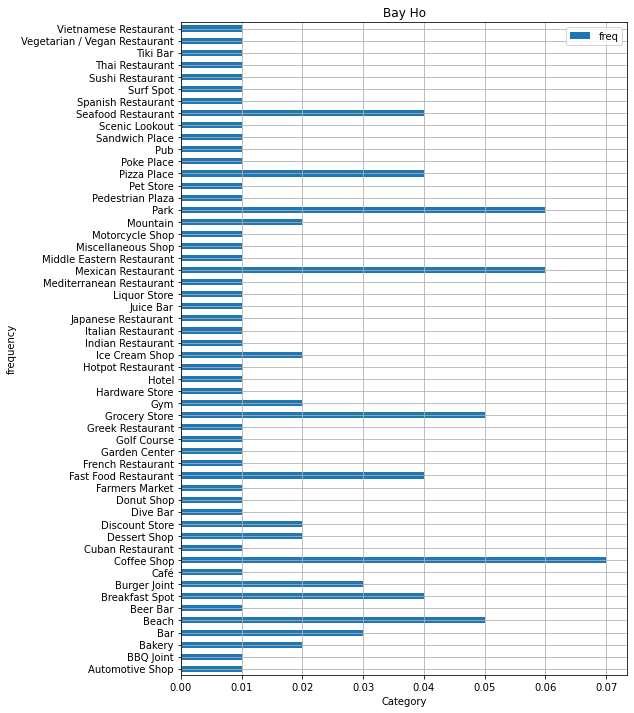

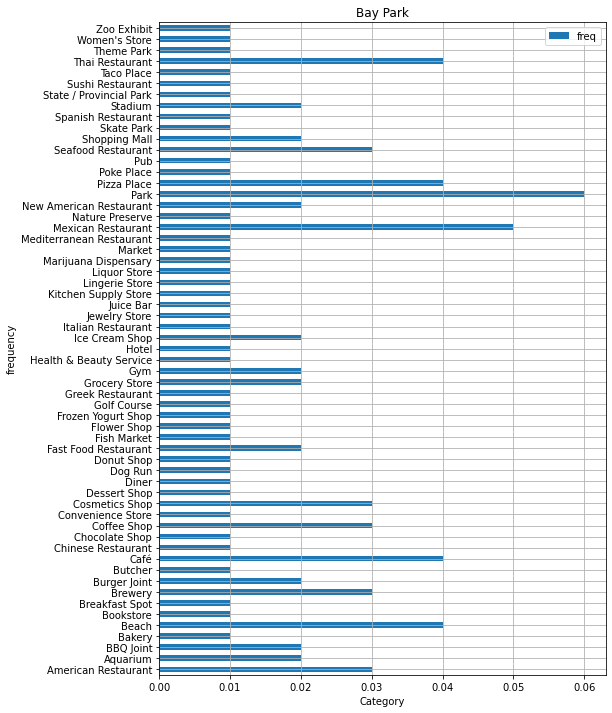

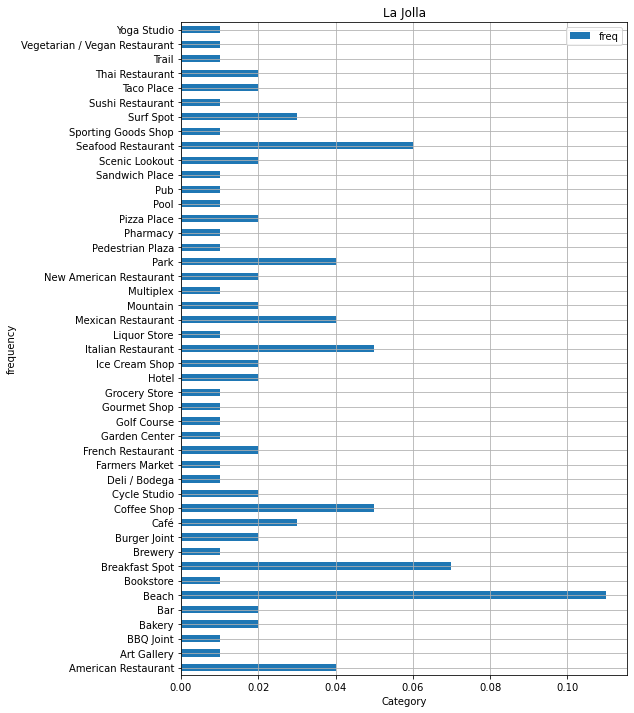

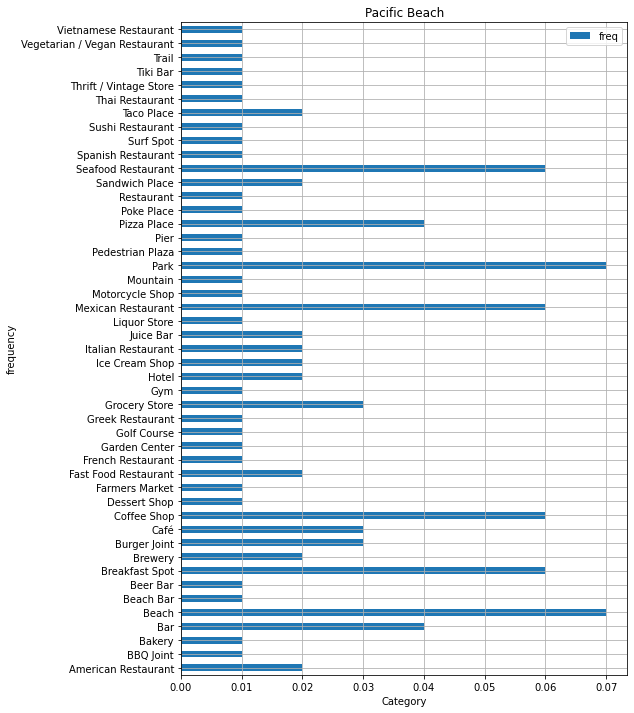

In [130]:
num_top_venues = 10
i=0
plt.show()
for hood in cluster1['Neighborhood']:
    print("----"+hood+"----")
    i=i+1
    temp = Sandiego_grouped[Sandiego_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')
    temp=temp[temp['freq'] != 0]
    #temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    temp.set_index('venue',inplace=True)
    temp.plot(kind='barh',grid=True,figsize=(8,12))
    plt.title(hood)
    plt.xlabel('Category')
    plt.ylabel('frequency')
plt.show()


In [56]:
cluster2=Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 1, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]
Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 1, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]

,Neighborhood,Price ($),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Clairemont Mesa East,757674,1,Japanese Restaurant,Sushi Restaurant,Grocery Store,Korean Restaurant,Café,Pizza Place,Dessert Shop,Mexican Restaurant,Noodle House,Fast Food Restaurant
4,Clairemont Mesa West,810498,1,Japanese Restaurant,Grocery Store,Sushi Restaurant,Pizza Place,Fast Food Restaurant,Thai Restaurant,Korean Restaurant,Park,Coffee Shop,Mexican Restaurant
11,North Clairemont,790675,1,Coffee Shop,Grocery Store,Mexican Restaurant,Pizza Place,Park,Fast Food Restaurant,Japanese Restaurant,Korean Restaurant,Ice Cream Shop,Sporting Goods Shop


----Clairemont Mesa East----
----Clairemont Mesa West----
----North Clairemont----


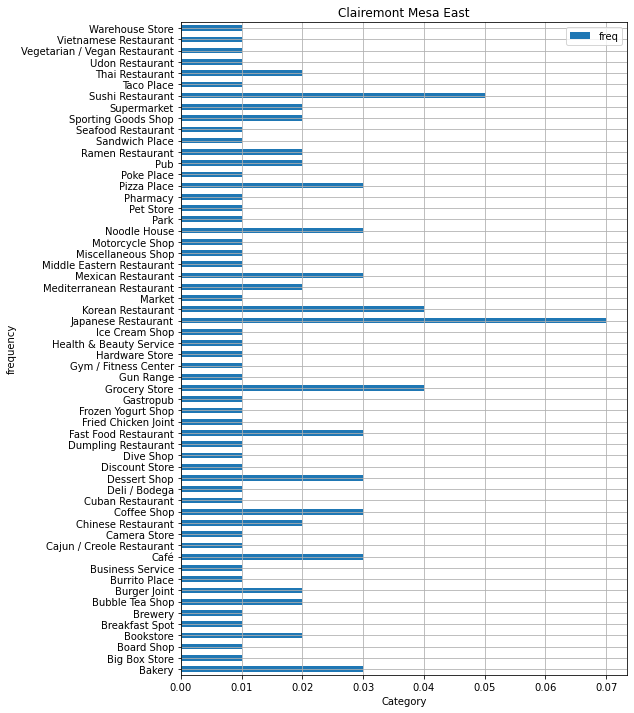

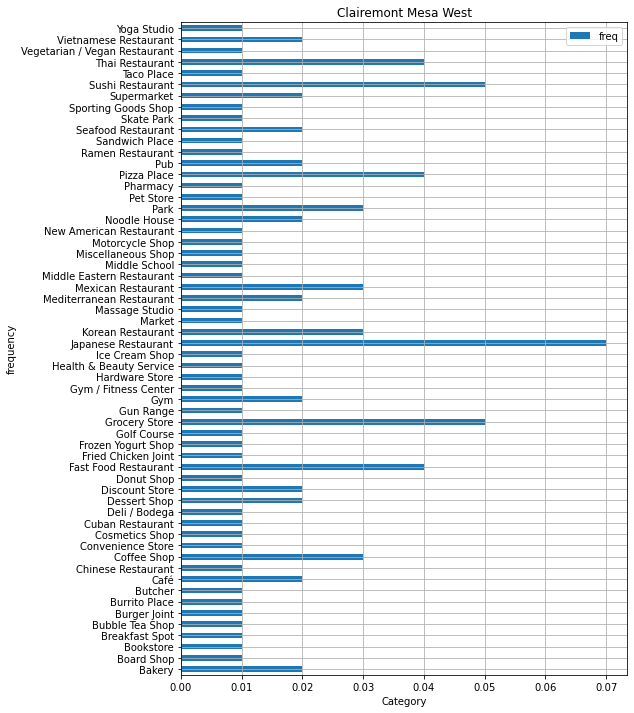

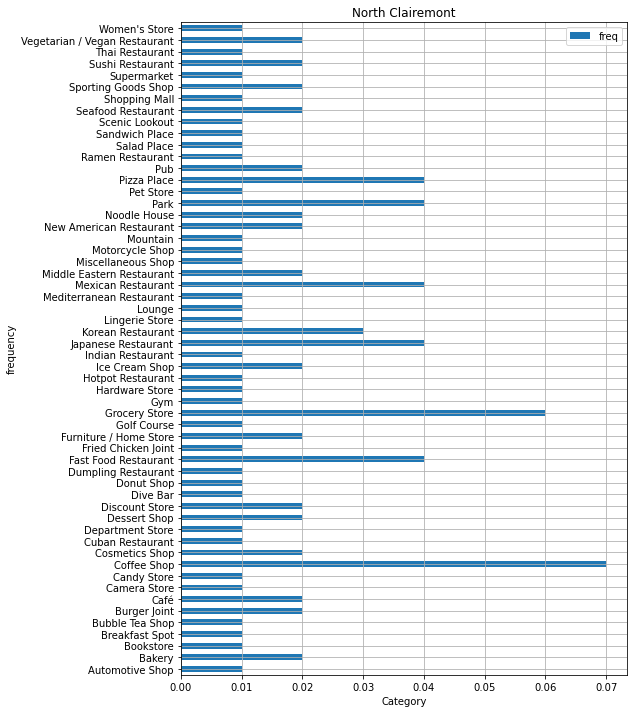

In [129]:
num_top_venues = 20
colors_array = cm.rainbow(np.linspace(0, 1, 20))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for hood in cluster2['Neighborhood']:
    print("----"+hood+"----")
    temp = Sandiego_grouped[Sandiego_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')
    temp=temp[temp['freq'] != 0]
    #temp=temp.sort_values('freq', ascending=False).head(num_top_venues)
    temp.set_index('venue',inplace=True)
    temp.plot(kind='barh',grid=True,figsize=(8,12))
    plt.title(hood)
    plt.xlabel('Category')
    plt.ylabel('frequency')
plt.show()
    

In [49]:
cluster3=Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 2, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]
Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 2, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]

,Neighborhood,Price ($),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,La Jolla Village,784488,2,Coffee Shop,Seafood Restaurant,Beach,Park,Café,New American Restaurant,Grocery Store,Italian Restaurant,Scenic Lookout,Ice Cream Shop
13,Torrey Pines,603162,2,Beach,Trail,New American Restaurant,Coffee Shop,Furniture / Home Store,Brewery,Burger Joint,Cosmetics Shop,Gym,Grocery Store
15,University City,784488,2,Coffee Shop,Sandwich Place,Burger Joint,Grocery Store,New American Restaurant,Furniture / Home Store,Park,Cosmetics Shop,Gym,Clothing Store


----La Jolla Village----


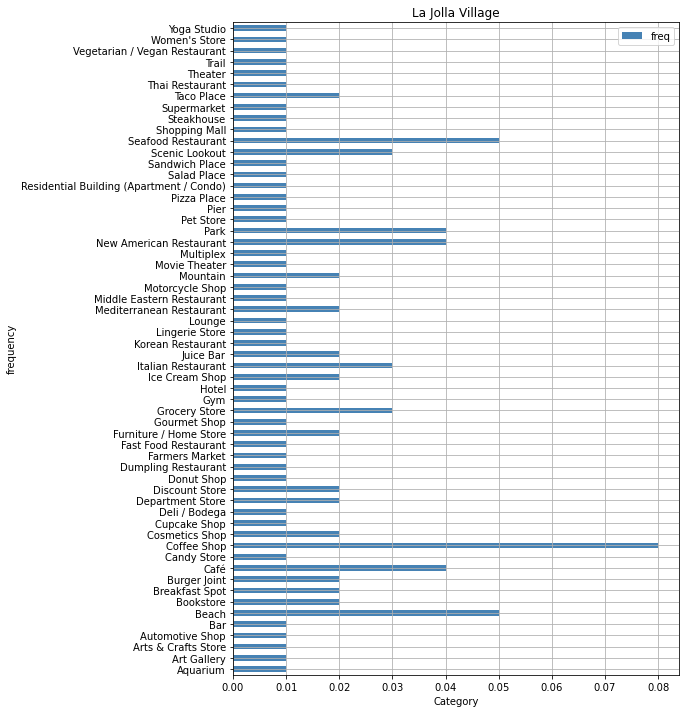

----Torrey Pines----


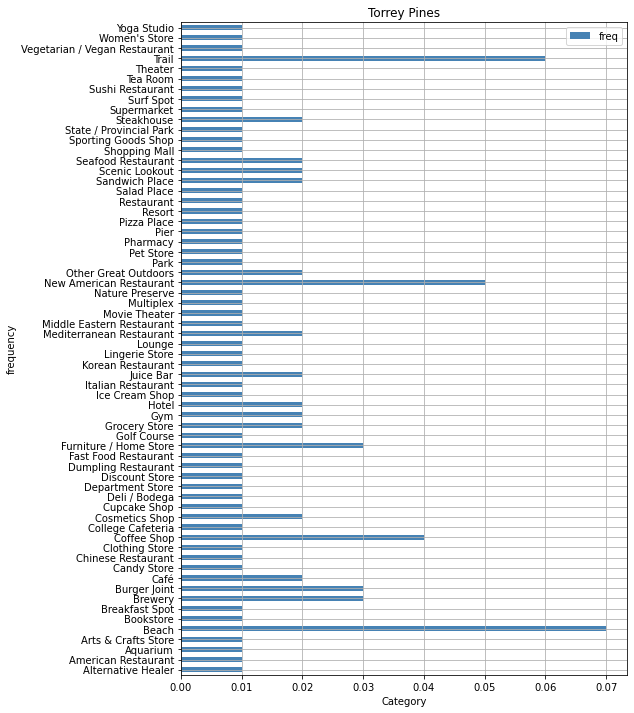

----University City----


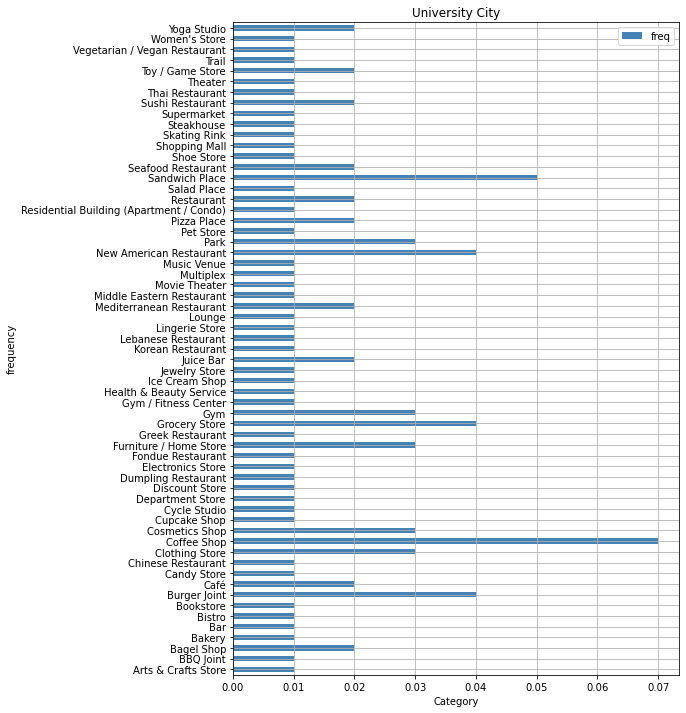

In [128]:
num_top_venues = 20
for hood in cluster3['Neighborhood']:
    print("----"+hood+"----")
    temp = Sandiego_grouped[Sandiego_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')
    temp=temp[temp['freq'] != 0]
    temp.set_index('venue',inplace=True)

    temp.plot(kind='barh',figsize=(8,12),grid=True,color='steelblue')
    plt.title(hood)
    plt.xlabel('Category')
    plt.ylabel('frequency')
    plt.show()

In [46]:
cluster4=Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 3, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]
Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 3, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]

,Neighborhood,Price ($),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Mission Beach,1287889,3,Beach,Park,Bar,American Restaurant,Brewery,Burger Joint,Mexican Restaurant,Coffee Shop,Seafood Restaurant,Café
9,Mission Bay Park,828656,3,Park,Beach,Coffee Shop,Bar,Brewery,Seafood Restaurant,Grocery Store,Fast Food Restaurant,Breakfast Spot,Theme Park


----Mission Beach----


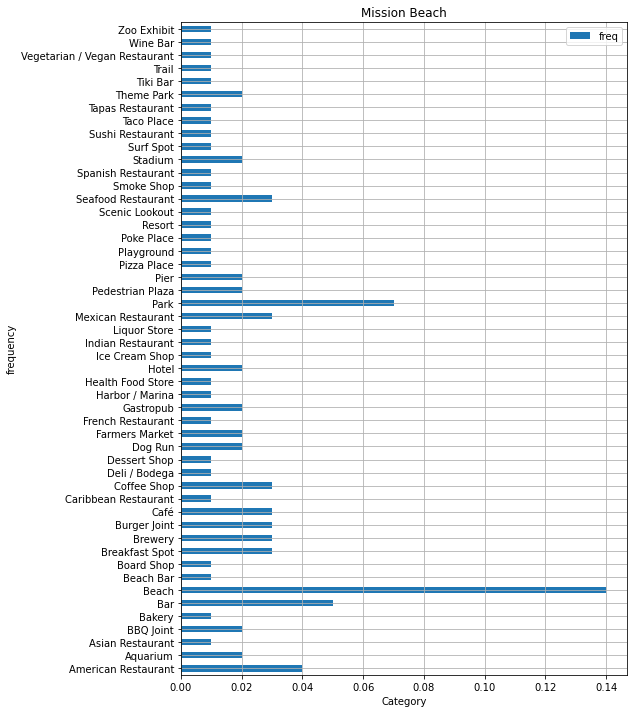

----Mission Bay Park----


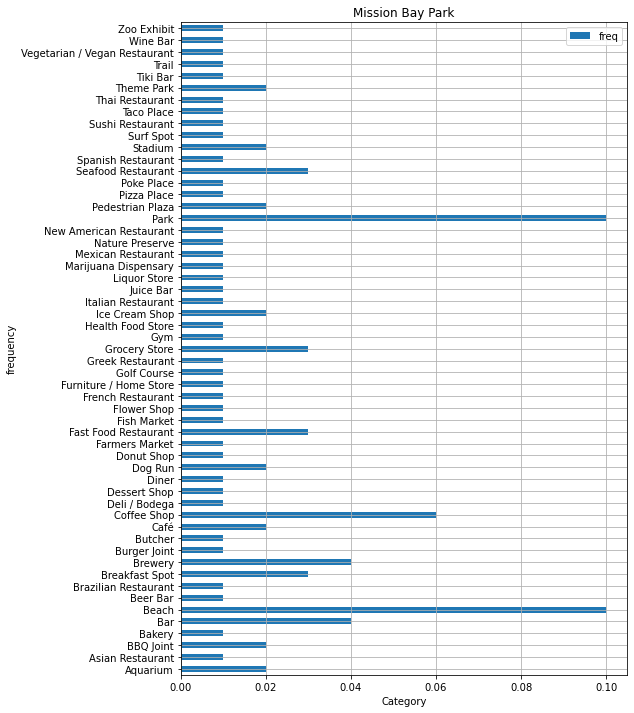

In [127]:
num_top_venues = 20
for hood in cluster4['Neighborhood']:
    print("----"+hood+"----")
    temp = Sandiego_grouped[Sandiego_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')
    temp=temp[temp['freq'] != 0]
    temp.set_index('venue',inplace=True)

    temp.plot(kind='barh',figsize=(8,12),grid=True)
    plt.title(hood)
    plt.xlabel('Category')
    plt.ylabel('frequency')
    plt.show()

In [43]:
cluster5=Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 4, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]
Sandiego_merged.loc[Sandiego_merged['Cluster Labels'] == 4, Sandiego_merged.columns[[1,4] + list(range(5, Sandiego_merged.shape[1]))]]


,Neighborhood,Price ($),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Carmel Valley,1284041,4,Coffee Shop,Beach,Seafood Restaurant,Trail,Italian Restaurant,American Restaurant,Mediterranean Restaurant,New American Restaurant,Golf Course,Restaurant
5,Del Mar Heights,1643284,4,Coffee Shop,Beach,Seafood Restaurant,Mexican Restaurant,American Restaurant,Trail,Italian Restaurant,Grocery Store,Breakfast Spot,Park
10,North City,1801601,4,Golf Course,Coffee Shop,Restaurant,American Restaurant,Grocery Store,Italian Restaurant,Seafood Restaurant,Pizza Place,Breakfast Spot,New American Restaurant
14,Torrey Preserve,1524588,4,Coffee Shop,Beach,Trail,Mexican Restaurant,Scenic Lookout,American Restaurant,Italian Restaurant,New American Restaurant,Seafood Restaurant,Hotel


----Carmel Valley----


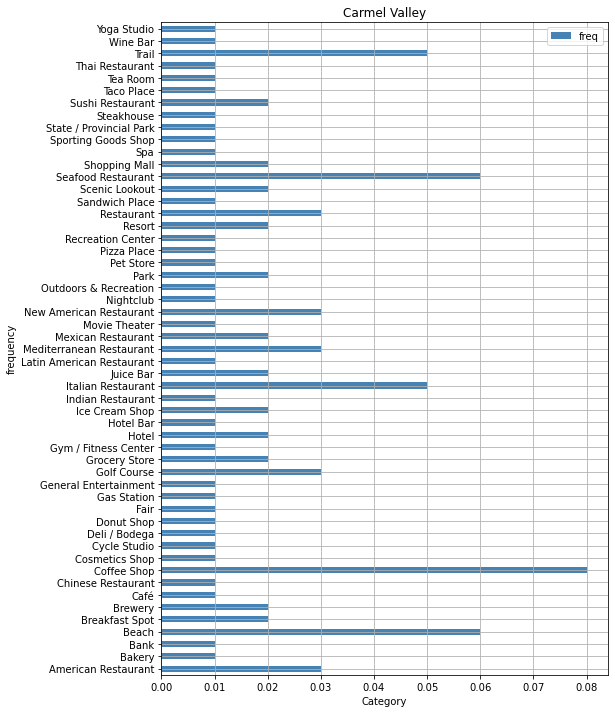

----Del Mar Heights----


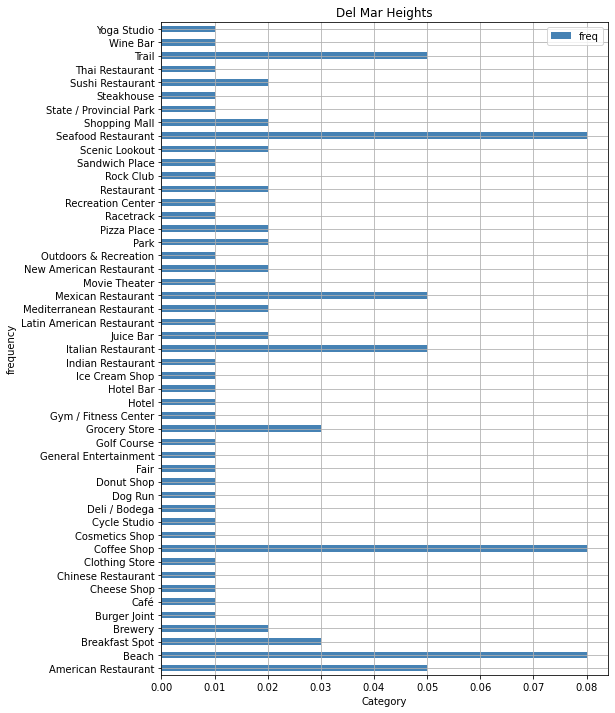

----North City----


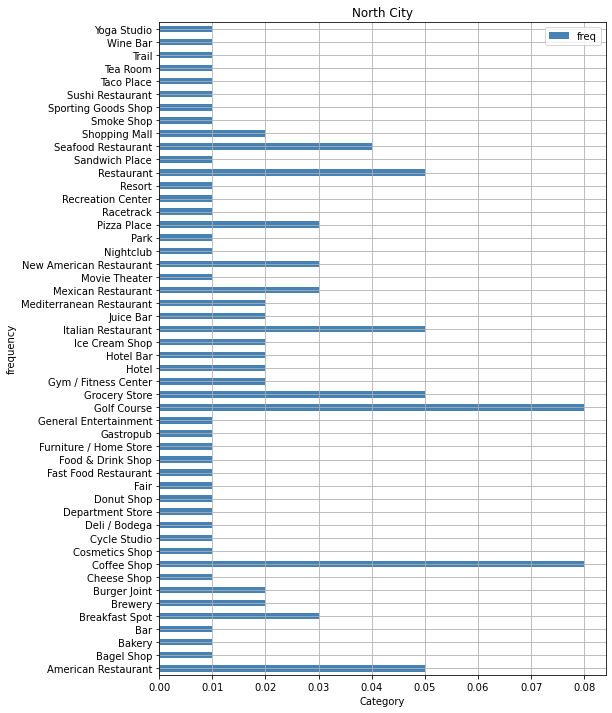

----Torrey Preserve----


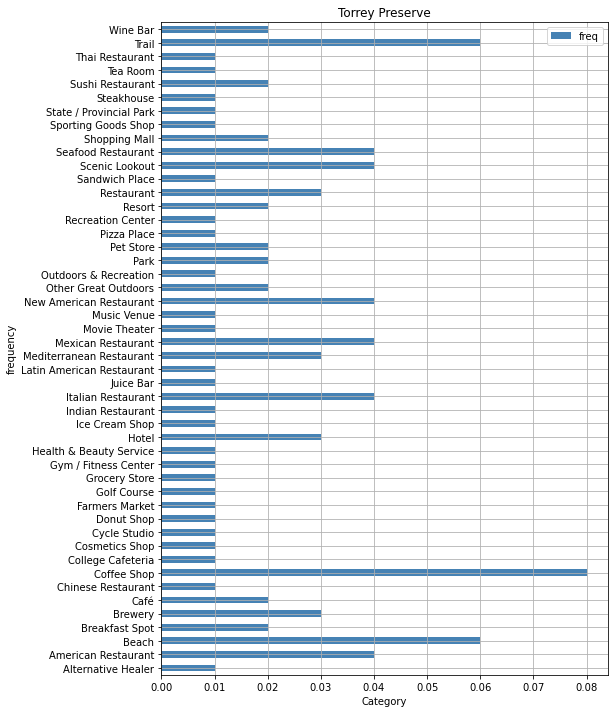

In [126]:
num_top_venues = 20
for hood in cluster5['Neighborhood']:
    print("----"+hood+"----")
    temp = Sandiego_grouped[Sandiego_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')
    temp=temp[temp['freq'] != 0]
    temp.set_index('venue',inplace=True)

    temp.plot(kind='barh',figsize=(8,12),grid=True,color='steelblue')
    plt.title(hood)
    plt.xlabel('Category')
    plt.ylabel('frequency')
    plt.show()